In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load datasets
fraud_train = pd.read_csv("C:/Users/ASUS/Desktop/fraudTrain.csv")
fraud_test = pd.read_csv("C:/Users/ASUS/Desktop/fraudTest.csv")

In [3]:
# Display basic information about the datasets
print("Training data:")
print(fraud_train.info())
print("\nTesting data:")
print(fraud_test.info())

Training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  lon

In [4]:
# Convert 'trans_date_trans_time' to Unix timestamp
fraud_train['trans_unix_time'] = (pd.to_datetime(fraud_train['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
                                  - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
fraud_test['trans_unix_time'] = (pd.to_datetime(fraud_test['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
                                 - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [5]:
# Drop the original 'trans_date_trans_time' columns
fraud_train = fraud_train.drop(['trans_date_trans_time'], axis=1)
fraud_test = fraud_test.drop(['trans_date_trans_time'], axis=1)

In [6]:
# Separate features and target variable
X_train = fraud_train.drop(['is_fraud'], axis=1)
y_train = fraud_train['is_fraud']
X_test = fraud_test.drop(['is_fraud'], axis=1)
y_test = fraud_test['is_fraud']

In [7]:
# Combine training and test sets for LabelEncoder
combined_data = pd.concat([X_train, X_test], axis=0)

In [8]:
# Handle remaining categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in combined_data.select_dtypes(include=['object']).columns:
    combined_data[column] = combined_data[column].astype(str)  # Convert all to strings
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

In [9]:
# Split back to training and test sets
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

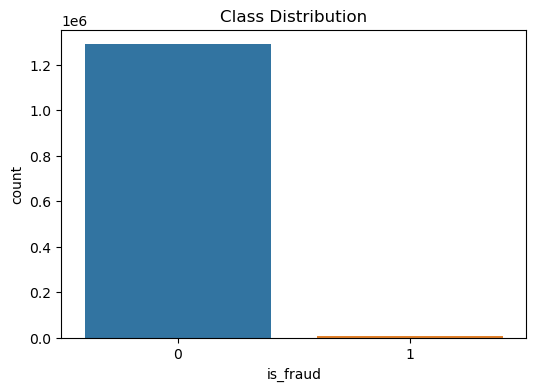

In [12]:
# Visualizations

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=fraud_train)
plt.title('Class Distribution')
plt.show()

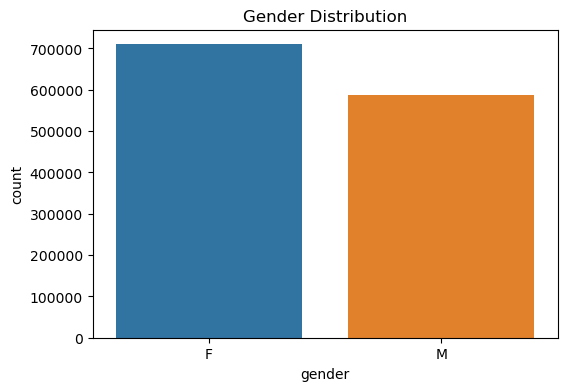

In [13]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=fraud_train)
plt.title('Gender Distribution')
plt.show()

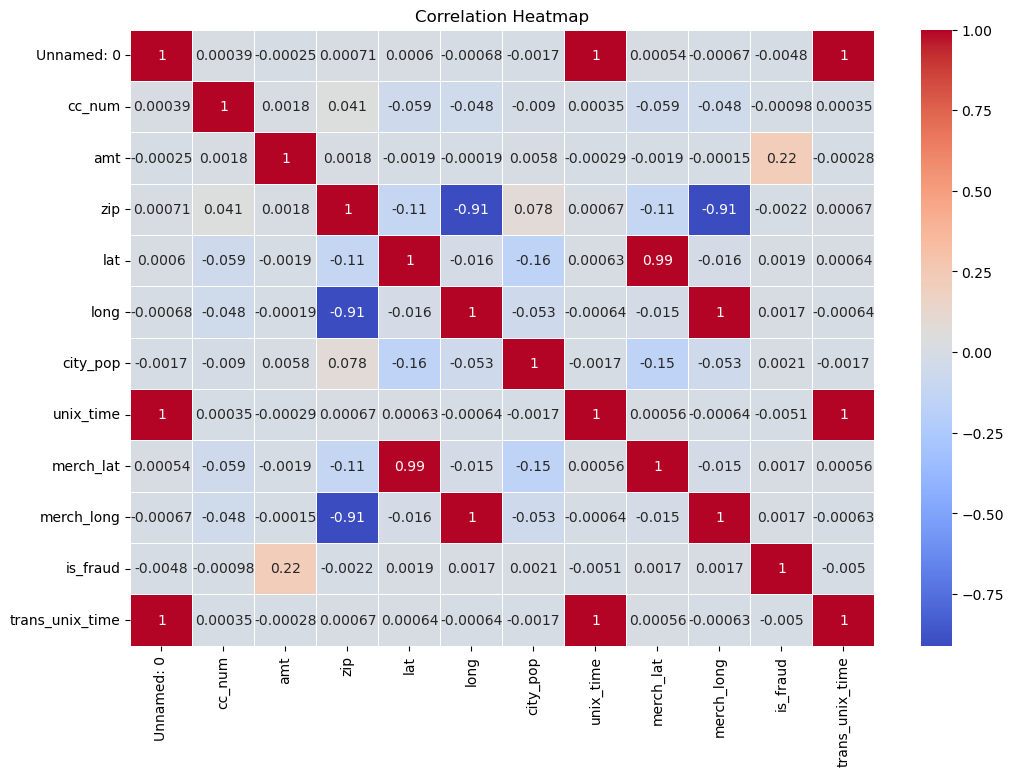

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Predictions on the validation set
dt_predictions_val = dt_model.predict(X_val)
dt_accuracy_val = accuracy_score(y_val, dt_predictions_val)

In [17]:
print("Decision Tree Validation Accuracy:", dt_accuracy_val)
print("Confusion Matrix:\n", confusion_matrix(y_val, dt_predictions_val))
print("Classification Report:\n", classification_report(y_val, dt_predictions_val))

Decision Tree Validation Accuracy: 0.996063007307151
Confusion Matrix:
 [[257266    549]
 [   472   1048]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.66      0.69      0.67      1520

    accuracy                           1.00    259335
   macro avg       0.83      0.84      0.84    259335
weighted avg       1.00      1.00      1.00    259335



In [18]:
# Predictions on the test set
dt_predictions_test = dt_model.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, dt_predictions_test)


In [19]:
print("\nDecision Tree Test Accuracy:", dt_accuracy_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions_test))
print("Classification Report:\n", classification_report(y_test, dt_predictions_test))


Decision Tree Test Accuracy: 0.9867433001211043
Confusion Matrix:
 [[547174   6400]
 [   967   1178]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.16      0.55      0.24      2145

    accuracy                           0.99    555719
   macro avg       0.58      0.77      0.62    555719
weighted avg       0.99      0.99      0.99    555719



In [21]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, filled=True, feature_names=X_train.columns, class_names=['Legitimate', 'Fraudulent'], rounded=True, fontsize=10)
plt.show()

NameError: name 'tree_to_visualize' is not defined

<Figure size 2000x1000 with 0 Axes>

In [29]:
pip install dtreeviz

     ---------------------------------------- 91.8/91.8 kB 1.3 MB/s eta 0:00:00
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


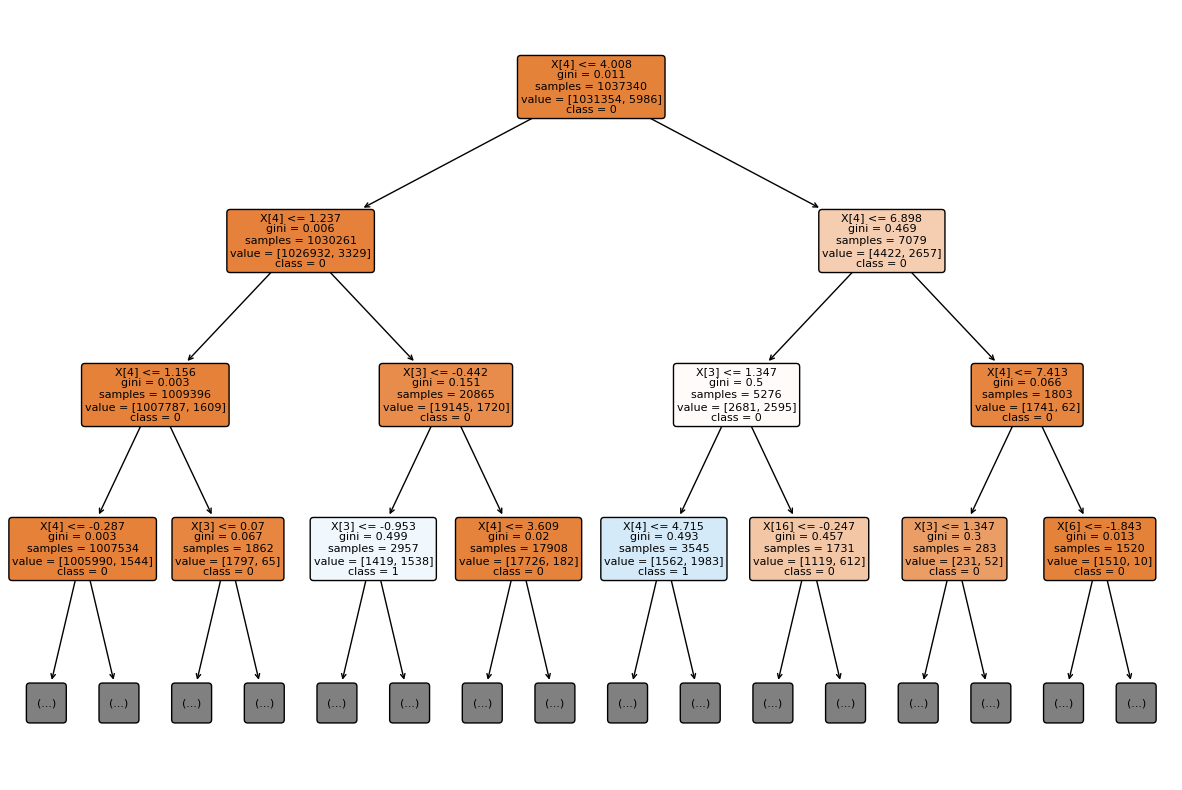

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, class_names=['0', '1'], rounded=True, fontsize=8, max_depth=3)
plt.show()
